In [1]:
import os
import joblib
import numpy as np
import pandas as pd

# Step 1: Define project root and model path
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
model_dir = os.path.join(project_root, "models")

# Step 2: Load the saved models
rf_model_path = os.path.join(model_dir, "rf_best_model.pkl")
xgb_model_path = os.path.join(model_dir, "xgb_best_model.pkl")

rf_model = joblib.load(rf_model_path)
xgb_model = joblib.load(xgb_model_path)

# Step 3: Prediction function
def predict_with_models(X_new):
    """
    Predicts using the loaded Random Forest and XGBoost models.
    
    Parameters:
    X_new (np.ndarray or pd.DataFrame): Feature matrix for new samples.

    Returns:
    dict: Probabilities from both models.
    """
    rf_preds = rf_model.predict_proba(X_new)[:, 1]
    xgb_preds = xgb_model.predict_proba(X_new)[:, 1]
    
    return {
        "rf_probability": rf_preds,
        "xgb_probability": xgb_preds
    }

# Step 4: Example usage
X_example = np.random.rand(5, rf_model.n_features_in_)  # mock 5 samples

print (X_example)

preds = predict_with_models(X_example)

# Display results
print("Random Forest Probabilities:", preds["rf_probability"])
print("XGBoost Probabilities:", preds["xgb_probability"])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[[8.55363498e-01 5.01845047e-01 5.02863857e-01 6.48845870e-01
  6.16970436e-01 2.36481794e-02 7.02242179e-01 1.73247303e-01
  8.01653830e-01 7.24751846e-01 8.07780755e-01 4.53677358e-01
  7.81042861e-01 7.56789426e-01 4.34369036e-01 4.57438325e-01
  3.04535756e-01 5.59201374e-01 6.35167452e-01 6.13777657e-01
  4.21484962e-01 9.04517850e-01 5.75542852e-01 1.57650159e-01
  1.57668712e-01 4.05917923e-01 3.51405961e-01 5.99431952e-01
  3.05024405e-01 5.55458433e-01 7.14264191e-01 9.78025690e-01
  8.

✅ Max MACCS similarity = 1.00 — within applicability domain.
🔍 Closest training molecule: CC(C)(C)c1ccc([C@@H](O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)CC2)cc1 with similarity 1.000
0.9247761
Top 10 SHAP-positive features with bit = 1:
MACCS_141: 0.3995 ↑
MACCS_155: 0.1139 ↑
MACCS_152: 0.0953 ↑
MACCS_128: 0.0944 ↑
MACCS_125: 0.0667 ↑
MACCS_66: 0.0633 ↑
MACCS_112: 0.0548 ↑
MACCS_111: 0.0525 ↑
MACCS_145: 0.0489 ↑
MACCS_75: 0.0387 ↑


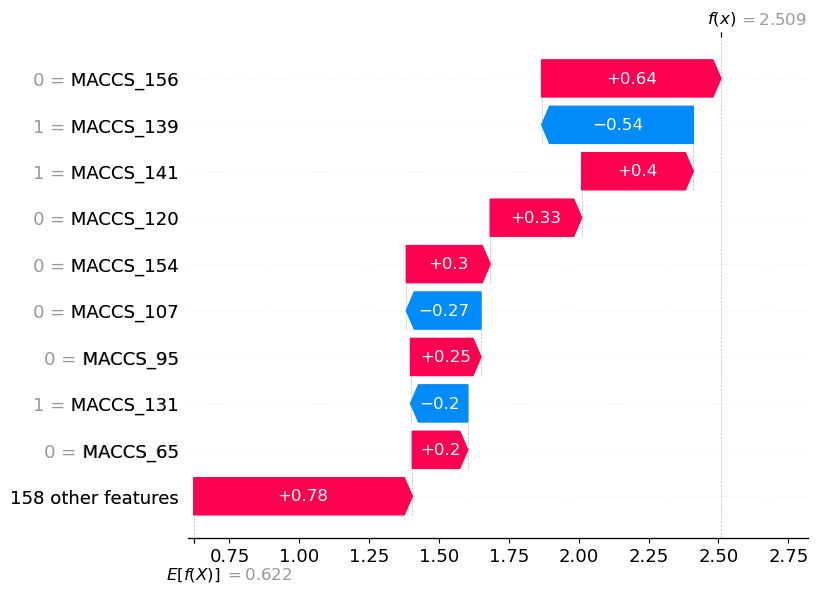

In [4]:
# Step 1: Define project root and model path
#notebook_dir = os.getcwd()
#project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
#model_dir = os.path.join(project_root, "models")
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.shap_utils import generate_maccs_fingerprint, plot_waterfall_shap1
from src.plot_utils import highlight_top_maccs_features
import pandas as pd
import joblib
from IPython.display import SVG, display
# Load model and background
model = joblib.load("../models/xgb_best_model.pkl")
X_train = joblib.load("../models/X_train.pkl")
feature_names = [f"MACCS_{i}" for i in range(167)]
background_df = pd.DataFrame(X_train, columns=feature_names)

# SMILES input
#smiles = "CO[C@H]1CN(CC[C@H]1NC(=O)C2=CC(=C(C=C2OC)N)Cl)CCCOC3=CC=C(C=C3)F"

smiles="CC(C)(C)C1=CC=C(C=C1)C(CCCN2CCC(CC2)C(C3=CC=CC=C3)(C4=CC=CC=C4)O)O"

#smiles="FC(C=C(C=C1)Cl)=C1COC2=CC=CC(C3CCN(CC4=NC5=C(C=NC=C5)N4C)CC3)=N2"



from src.applicable_domain import load_maccs_training_fps, check_applicability_domain, get_max_maccs_similarity_with_match

# Load once
train_fps, train_smiles = load_maccs_training_fps()

# For a single test SMILES

max_sim = check_applicability_domain(smiles, train_fps)

# Optional: get the most similar molecule
sim_score, closest_train_smiles = get_max_maccs_similarity_with_match(smiles, train_fps, train_smiles)
print(f"🔍 Closest training molecule: {closest_train_smiles} with similarity {sim_score:.3f}")

#smiles = "O=C(O)C1=CC(N2C[C@@H]3CCO3)=C(C(F)=C1)N=C2CN(CC4)N=CN4C5=NC(OCC6=C(OC)C=C(C(F)(F)F)C=C6)=CC=C5"

#smiles = "FC(C=C(F)C=C1)=C1COC2=CC=CC(C3CCN(CC4=NC5=CC=C(C(O)=O)C=C5N4CC6=CN=CN6CC)CC3)=N2"
#smiles = "FC(C=C(C#N)C=C1)=C1COC2=CC=CC(C3CCN(CC4=NC5=CC=C(C(O)=O)C=C5N4C[C@@H]6CCO6)CC3)=N2"
#smiles="CC(C)(C1=CC=C(C=C1)C(CCCN2CCC(CC2)C(C3=CC=CC=C3)(C4=CC=CC=C4)O)O)C(=O)O"

#smiles ="CNC(=O)c1c(oc2ccc(c(c12)CN1CCCCC1)O)-c1ccc(cc1)O"
#smiles ="CNC(=O)c1c(oc2ccc(c(c12)CN1CCC2(COC2)C1)O)-c1ccc(cc1)O"
fingerprint, mol = generate_maccs_fingerprint(smiles)
fingerprint_df = pd.DataFrame([fingerprint], columns=feature_names)

predict = model.predict_proba([fingerprint])[:,1][0]
print (predict)
# Plot waterfall
plot_waterfall_shap1(model, fingerprint_df, background_df, feature_names)
import shap
# Highlight top SHAP MACCS features
#svg_output = highlight_top_maccs_features(mol, shap.Explanation(values=model.predict(fingerprint_df), data=fingerprint_df, feature_names=feature_names), feature_names)
#display(SVG(svg_output))

Top 10 SHAP-positive features with bit = 1:
MACCS_103: 0.2832 ↑
MACCS_107: 0.1528 ↑
MACCS_126: 0.1497 ↑
MACCS_85: 0.1426 ↑
MACCS_113: 0.1213 ↑
MACCS_105: 0.0787 ↑
MACCS_155: 0.0784 ↑
MACCS_134: 0.0738 ↑
MACCS_111: 0.0718 ↑
MACCS_128: 0.0696 ↑


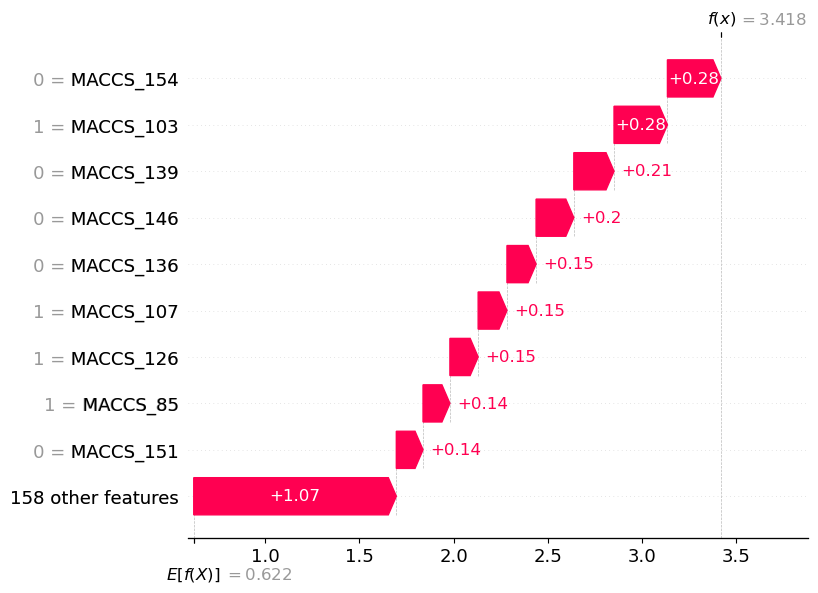

[103, 107, 126, 85, 113, 105, 155, 134, 111, 128]


In [ ]:
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.plot_utils import draw_molecule_with_shap_highlights4
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, Draw
import numpy as np
from IPython.display import display
from PIL import Image
import io
results = plot_waterfall_shap1(model, fingerprint_df, background_df, feature_names)


#mol = Chem.MolFromSmiles("CO[C@H]1CN(CC[C@H]1NC(=O)C2=CC(=C(C=C2OC)N)Cl)CCCOC3=CC=C(C=C3)F")
#mol = Chem.MolFromSmiles("CC(C)(C)C1=CC=C(C=C1)C(CCCN2CCC(CC2)C(C3=CC=CC=C3)(C4=CC=CC=C4)O)O")
mol=Chem.MolFromSmiles("FC(C=C(C=C1)Cl)=C1COC2=CC=CC(C3CCN(CC4=NC5=C(C=NC=C5)N4C)CC3)=N2") #Series
#mol=Chem.MolFromSmiles("O=C(O)C1=CC(N2C[C@@H]3CCO3)=C(C(F)=C1)N=C2CN(CC4)N=CN4C5=NC(OCC6=C(OC)C=C(C(F)(F)F)C=C6)=CC=C5")
#mol =Chem.MolFromSmiles("CC(C)(C1=CC=C(C=C1)C(CCCN2CCC(CC2)C(C3=CC=CC=C3)(C4=CC=CC=C4)O)O)C(=O)O")
#mol = Chem.MolFromSmiles("CNC(=O)c1c(oc2ccc(c(c12)CN1CCCCC1)O)-c1ccc(cc1)O")
#mol = Chem.MolFromSmiles("CNC(=O)c1c(oc2ccc(c(c12)CN1CCC2(COC2)C1)O)-c1ccc(cc1)O")
#mol = Chem.MolFromSmiles("FC(C=C(F)C=C1)=C1COC2=CC=CC(C3CCN(CC4=NC5=CC=C(C(O)=O)C=C5N4CC6=CN=CN6CC)CC3)=N2")
#mol = Chem.MolFromSmiles("FC(C=C(C#N)C=C1)=C1COC2=CC=CC(C3CCN(CC4=NC5=CC=C(C(O)=O)C=C5N4C[C@@H]6CCO6)CC3)=N2")
# Example: shap_values_array and maccs_features should come from your prediction and fingerprint
# Generate MACCS fingerprint
maccs_fp = rdMolDescriptors.GetMACCSKeysFingerprint(mol)
# Convert fingerprint to bit string


top_n_idx = results["top_features"]

shap_values_array = results["shap_values_array"]

print (top_n_idx)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0']


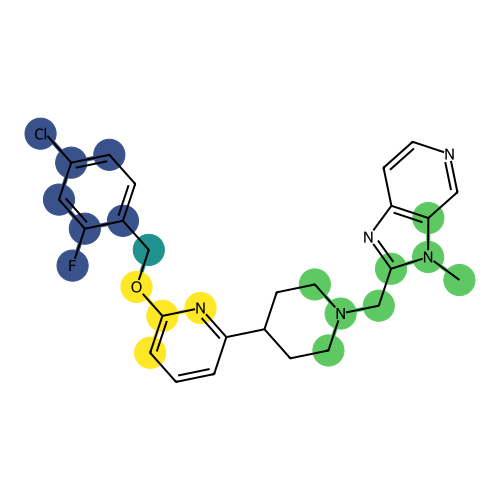

In [50]:
maccs_features = list(maccs_fp.ToBitString()) 
print (maccs_features)
img_bytes = draw_molecule_with_shap_highlights4(mol, shap_values_array, maccs_features, top_n_idx, top_n=5)
display(Image.open(io.BytesIO(img_bytes)))


NameError: name 'smartsPatts' is not defined

In [ ]:
from rdkit.Chem.MACCSkeys import GenMACCSKeys
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys

from src.plot_utils import draw_molecule_with_shap_highlights3

# Create MACCS fingerprint and dummy SHAP values
maccs_fp = GenMACCSKeys(mol)
maccs_array = np.array(list(maccs_fp.ToBitString()), dtype=int)
shap_values = np.random.rand(len(maccs_array)) * maccs_array  # SHAP only for active bits

draw_molecule_with_shap_highlights3(mol, shap_values, maccs_array, top_n=10, n_cols=5)

NameError: name 'smartsPatts' is not defined